In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Niyatikayastha/healthcare-dataset-stroke-data.csv")

In [5]:
# Display the shape of the dataframe
print("Shape of the dataframe:", df.shape)


Shape of the dataframe: (5110, 12)


In [7]:
print("\nFirst 5 rows of the dataframe:")
print(df.head())



First 5 rows of the dataframe:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [8]:
print("\nLast 5 rows of the dataframe:")
print(df.tail())


Last 5 rows of the dataframe:
         id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5

In [9]:
# Drop the 'id' column
df.drop(["id"],axis=1, inplace=True)


In [10]:
# Verify the 'id' column has been dropped
print("\nDataframe after dropping 'id' column:")
print(df.head())


Dataframe after dropping 'id' column:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [11]:
# Convert 'gender' column to numerical (Male:0, Female:1)
df["gender"]=df["gender"].replace({"Male":0,"Female":1, "Other": np.nan})

<ipython-input-11-22dcf74caa7f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"]=df["gender"].replace({"Male":0,"Female":1, "Other": np.nan})


In [12]:
# Display the dataframe after gender conversion
print("\nDataframe after gender conversion:")
print(df.head())



Dataframe after gender conversion:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0     0.0  67.0             0              1          Yes        Private   
1     1.0  61.0             0              0          Yes  Self-employed   
2     0.0  80.0             0              1          Yes        Private   
3     1.0  49.0             0              0          Yes        Private   
4     1.0  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [13]:
print("\nDataframe info:")
print(df.info())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 439.3+ KB
None


In [14]:
# Handle missing values: replace 'Other' in gender with NaN, then drop NaN rows
df['gender'].replace('Other', np.nan, inplace=True)
df.dropna(subset=['gender'], inplace=True)

<ipython-input-14-4d3a3612d1af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('Other', np.nan, inplace=True)


In [15]:
# Handle 'bmi' missing values: fill with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-15-ea047463c2e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [16]:
# Display the first few rows after one-hot encoding
print("\nDataframe after one-hot encoding:")
print(df.head())


Dataframe after one-hot encoding:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0     0.0  67.0             0              1          Yes        Private   
1     1.0  61.0             0              0          Yes  Self-employed   
2     0.0  80.0             0              1          Yes        Private   
3     1.0  49.0             0              0          Yes        Private   
4     1.0  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21  28.1     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [17]:

# Display value counts for 'stroke' column
print("\nValue counts for 'stroke' column:")
print(df['stroke'].value_counts())


Value counts for 'stroke' column:
stroke
0    4860
1     249
Name: count, dtype: int64


In [18]:
# Balance the dataset using SMOTE
X = df.drop('stroke', axis=1)
y = df['stroke']

In [19]:
# Select only numeric features for scaling
numeric_features = df.select_dtypes(include=['number']).drop(columns=['stroke']).columns

# Select categorical features for one-hot encoding
categorical_features = df.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply different preprocessing to different columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features) #sparse=False for numpy array
    ])

# All columns except target
X = df.drop(columns=["stroke"])
y = df["stroke"].values  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using the preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Now apply SMOTE on the transformed data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [20]:
# Convert the resampled data back to a DataFrame
# Get feature names after preprocessing (including one-hot encoded features)
feature_names_after_preprocessing = preprocessor.get_feature_names_out(input_features=X.columns)

df_resampled = pd.DataFrame(X_resampled, columns=feature_names_after_preprocessing)
df_resampled['stroke'] = y_resampled

In [21]:
# Display the shape of the resampled dataframe
print("\nShape of the resampled dataframe:", df_resampled.shape)



Shape of the resampled dataframe: (7800, 20)


In [22]:
# Display value counts for 'stroke' column in the resampled dataframe
print("\nValue counts for 'stroke' column in the resampled dataframe:")
print(df_resampled['stroke'].value_counts())


Value counts for 'stroke' column in the resampled dataframe:
stroke
0    3900
1    3900
Name: count, dtype: int64


In [23]:
# Split the data into training and testing sets
# Split the data into training and testing sets
X = df_resampled.drop('stroke', axis=1)
y = df_resampled['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [25]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

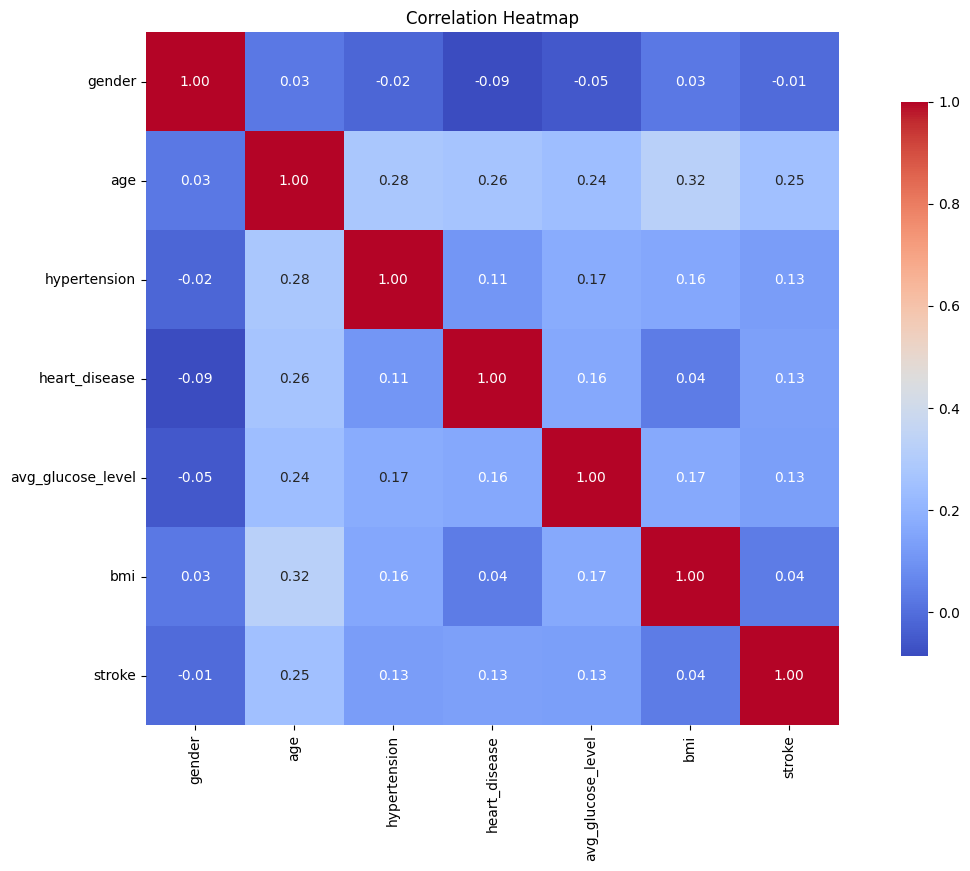

In [26]:
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

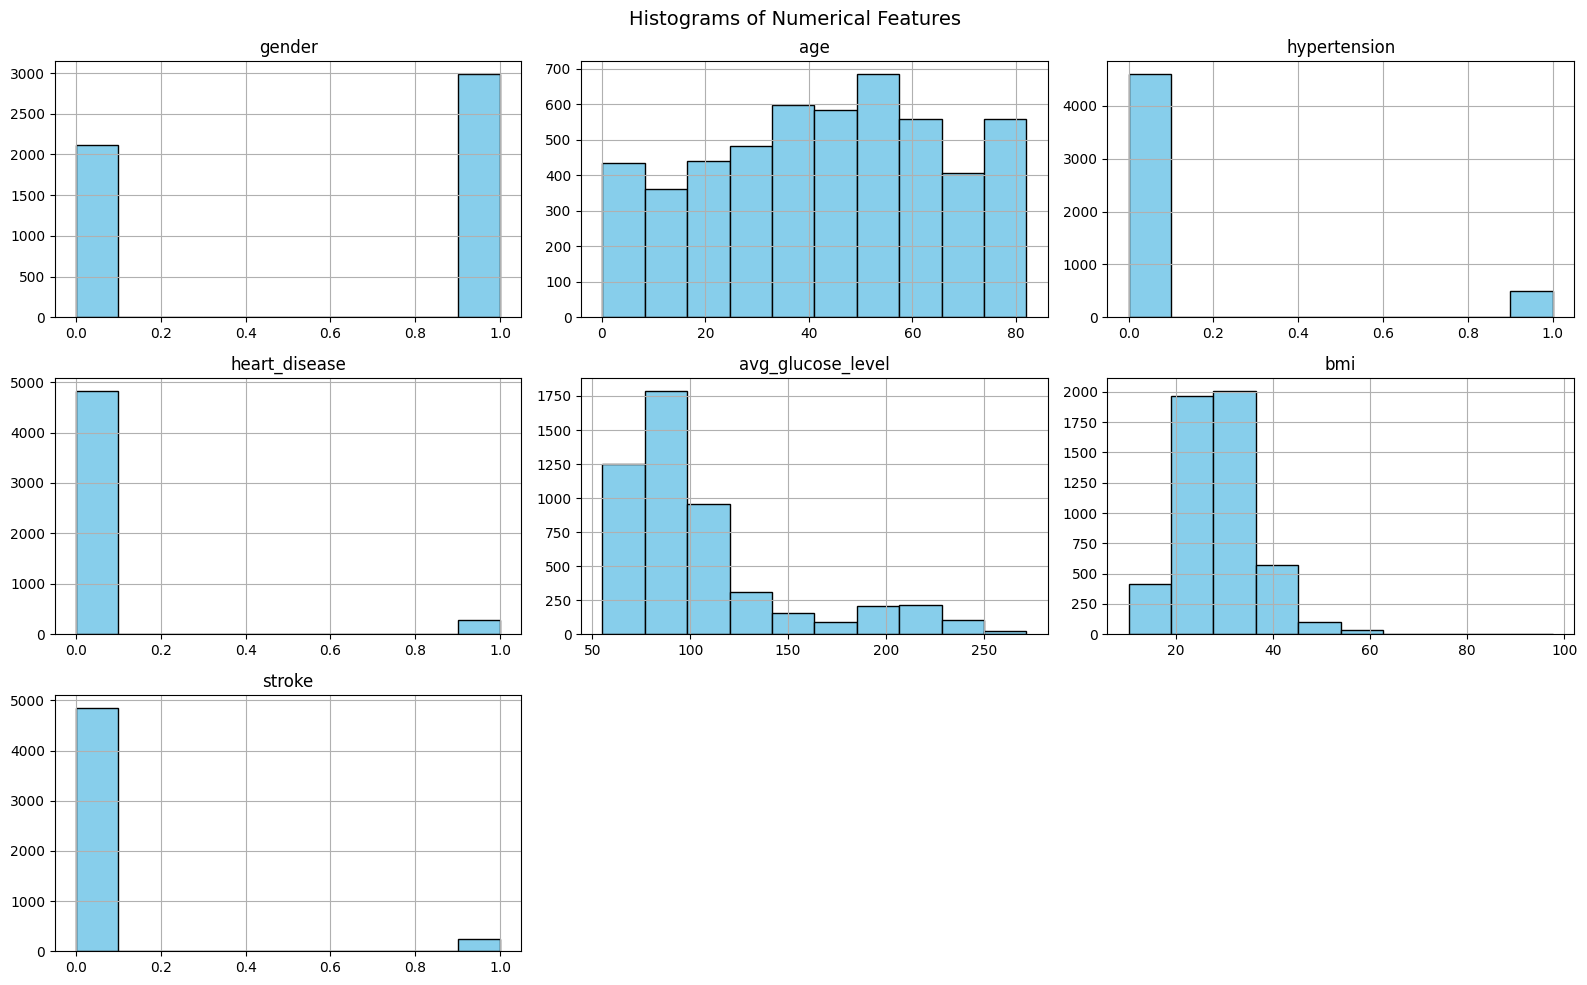

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
numerical_df.hist(bins=10, figsize=(16, 10), color='skyblue', edgecolor='black')

# Add title
plt.suptitle("Histograms of Numerical Features", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


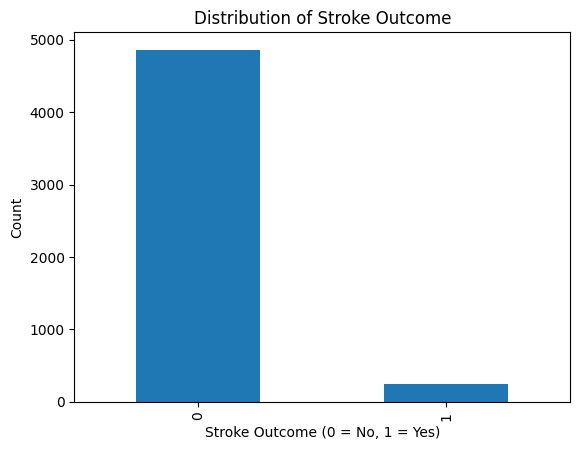

In [28]:
df['stroke'].value_counts().plot(kind='bar')
plt.title('Distribution of Stroke Outcome')
plt.xlabel('Stroke Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [29]:
df.shape

(5109, 11)

In [31]:
df.dtypes

,0
gender,float64
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5109.0,0.586025,0.492592,0.00,0.00,1.00,1.00,1.00
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.863300,7.699785,10.30,23.80,28.10,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


In [33]:
# Before running df.describe(include='object').T, check the data types of your columns.
print(df.dtypes)

# If there are no object columns, you might get the error.
# Instead, try describing numerical columns if needed:
df.describe(include='number').T  # or df.describe().T

gender               float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
gender,5109.0,0.586025,0.492592,0.00,0.00,1.00,1.00,1.00
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.863300,7.699785,10.30,23.80,28.10,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


In [34]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [35]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5105,False
5106,False
5107,False
5108,False


**EDA**

In [36]:
# Add this import statement at the beginning of your code
from sklearn.compose import ColumnTransformer

# Select only numeric features for scaling
numeric_features = df.select_dtypes(include=['number']).drop(columns=['stroke']).columns

# Select categorical features for one-hot encoding
categorical_features = df.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features) #sparse=False for numpy array
    ])

# All columns except target
X = df.drop(columns=["stroke"])
y = df["stroke"].values  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using the preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Dataset loaded and preprocessed successfully.")

Dataset loaded and preprocessed successfully.


In [37]:
print(np.isnan(X_train).sum())

0


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # Use "median" if data is skewed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Don't fit on test data!

In [39]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**Logistic Regression From Scratch**

In [40]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [41]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.weights = None  # Initialize weights to None
        self.bias = None  # Initialize bias to None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0  # Initialize bias to zero

        # Training loop
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias  # Linear model output
            y_predicted = sigmoid(linear_model)  # Apply sigmoid function

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Gradient for weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Gradient for bias

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  # Compute linear model output
        y_predicted = sigmoid(linear_model)  # Apply sigmoid function
        return [1 if i > 0.5 else 0 for i in y_predicted]  # Return predicted class (0 or 1)

In [42]:
# Create an instance of the LogisticRegressionScratch class
model_scratch = LogisticRegressionScratch(lr=0.01, epochs=1000)

# Train the model on the balanced dataset
model_scratch.fit(X_train_balanced, y_train_balanced)

In [43]:
#Make predictions on the test set
y_pred_scratch = model_scratch.predict(X_test)

In [44]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_scratch)
precision = precision_score(y_test, y_pred_scratch)
recall = recall_score(y_test, y_pred_scratch)
f1 = f1_score(y_test, y_pred_scratch)

# Display the results
print("Scratch model output:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Scratch model output:
Accuracy: 0.7133
Precision: 0.1552
Recall: 0.8387
F1 Score: 0.2620


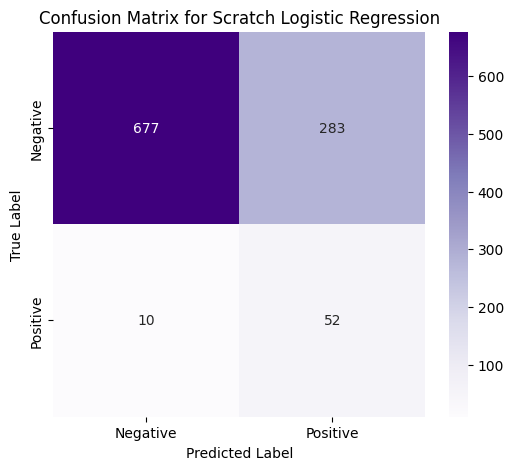

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_scratch)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Scratch Logistic Regression")

# Show plot
plt.show()

**Creating models from sklearn**

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression using Sklearn
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000)

In [48]:
# Make Predictions on the Test Set
y_pred_sklearn = model_sklearn.predict(X_test)

# Evaluate the Sklearn Model

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

In [49]:
# Display the results for Sklearn Logistic Regression
print("Logistic Regression (Sklearn):")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

Logistic Regression (Sklearn):
Accuracy: 0.7397
Precision: 0.1645
Recall: 0.8065
F1 Score: 0.2732


Logistic Regression (Sklearn):
Accuracy: 0.7397
Precision: 0.1645
Recall: 0.8065
F1 Score: 0.2732


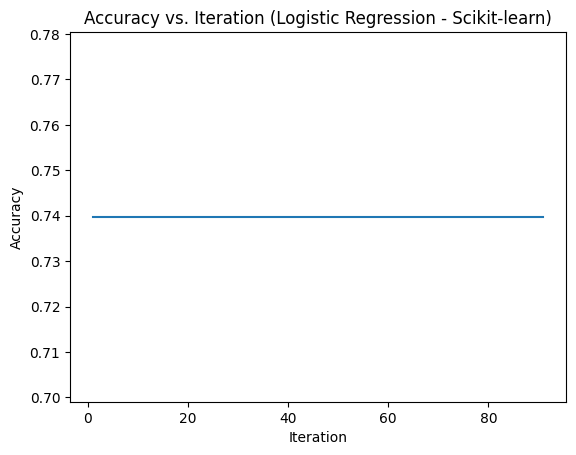

In [51]:
y_pred_sklearn = model_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Logistic Regression (Sklearn):")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

# Assuming you want to track accuracy for 100 iterations
max_iterations = 100
accuracy_history_sklearn = []  # Initialize list to store accuracy

# Train Logistic Regression using Sklearn, track accuracy every 10 iterations
model_sklearn = LogisticRegression(max_iter=max_iterations)
for i in range(1, max_iterations + 1, 10):
    model_sklearn.fit(X_train_balanced, y_train_balanced)
    y_pred_sklearn = model_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    accuracy_history_sklearn.append(accuracy_sklearn)  # Store accuracy

# Make Predictions on the Test Set
y_pred_sklearn = model_sklearn.predict(X_test)

# Evaluate the Sklearn Model
# ... (rest of your code)

# Plotting Accuracy vs. Iteration (Scikit-learn)
plt.plot(range(1, max_iterations + 1, 10), accuracy_history_sklearn)  # Now with defined variables
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration (Logistic Regression - Scikit-learn)")
plt.show()

Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'macro' or 'weighted' based on class imbalance
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display the results
print("Random Forest Classification:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Classification:
Accuracy: 0.9403
Precision: 0.9439
Recall: 0.9403
F1 Score: 0.9123


Hyper parameter optimization

for logistic reg

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'max_iter': [100, 500, 1000]  # Iterations
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression and GridSearchCV
model_sklearn = LogisticRegression()
grid_search = GridSearchCV(estimator=model_sklearn, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit model
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters: {'C': 0.01, 'max_iter': 100}
Best Cross-Validation Score: 0.7898717948717948


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Best model with the optimal parameters
best_model = LogisticRegression(C=0.1, max_iter=100)

# Train the best model
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_sklearn = best_model.predict(X_test)

# Evaluate performance
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

# Print results
print("Logistic Regression (Sklearn) after Tuning:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

Logistic Regression (Sklearn) after Tuning:
Accuracy: 0.7417
Precision: 0.1678
Recall: 0.8226
F1 Score: 0.2787


Hyper parameter optimization

for random forest


In [59]:
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train, y_train)

best_params = random_search_rf.best_params_
best_score = random_search_rf.best_score_
print("\nBest parameters for Random Forest:", best_params)
print("Best cross-validation score (Accuracy):", best_score)


Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best cross-validation score (Accuracy): 0.9542455102901964


In [57]:
# Train the best model found from tuning
best_rf_model = random_search_rf.best_estimator_

# Make predictions
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

# Display results
print("Classification (After Tuning):")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")

Classification (After Tuning):
Accuracy: 0.9393
Precision: 0.8823
Recall: 0.9393
F1 Score: 0.9100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Selection

for logistic reg

In [58]:

# Define your feature names (include all features)
feature_names = [
    "gender", "age", "hypertension", "heart_disease", "ever_married",
    "work_type", "Residence_type", "avg_glucose_level", "bmi",
    "smoking_status", "num__gender", "num__age", "num__hypertension",
    "num__heart_disease", "num__avg_glucose_level", "num__bmi",
    "cat__ever_married_No", "cat__ever_married_Yes",
    "cat__work_type_Govt_job", "cat__work_type_Never_worked",
    "cat__work_type_Private", "cat__work_type_Self-employed",
    "cat__work_type_children", "cat__Residence_type_Rural",
    "cat__Residence_type_Urban", "cat__smoking_status_Unknown",
    "cat__smoking_status_formerly smoked", "cat__smoking_status_never smoked",
    "cat__smoking_status_smokes"
]

# Check the shape of X_train_balanced and feature_names
num_features = X_train_balanced.shape[1]
if num_features != len(feature_names):
    print(f"Warning: Number of features ({num_features}) does not match "
          f"the length of feature_names ({len(feature_names)}). "
          f"Using generic column names.")
    feature_names = [f"feature_{i}" for i in range(num_features)]

# Create the DataFrame using the adjusted feature_names
X_train_balanced = pd.DataFrame(X_train_balanced, columns=feature_names)

# Check if the features match after DataFrame conversion
print(f"Shape of X_train_balanced: {X_train_balanced.shape}")
print(f"Length of feature_names: {len(feature_names)}")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Apply Recursive Feature Elimination (RFE) with Logistic Regression
rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 5 important features
rfe.fit(X_train_balanced, y_train_balanced)

# Get selected feature names
selected_features = X_train_balanced.columns[rfe.support_]
print("Selected Features using Logistic Regression and RFE:", list(selected_features))

# Alternatively, use RandomForestClassifier for faster feature selection
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_rf = RFE(estimator=rf_model, n_features_to_select=5)  # Select top 5 important features
rfe_rf.fit(X_train_balanced, y_train_balanced)

# Get selected feature names from Random Forest
selected_features_rf = X_train_balanced.columns[rfe_rf.support_]
print("Selected Features using Random Forest and RFE:", list(selected_features_rf))


Shape of X_train_balanced: (7800, 19)
Length of feature_names: 19
Selected Features using Logistic Regression and RFE: ['feature_1', 'feature_4', 'feature_11', 'feature_12', 'feature_18']
Selected Features using Random Forest and RFE: ['feature_1', 'feature_4', 'feature_5', 'feature_6', 'feature_10']


for random forest


In [61]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Using all cores for efficiency

# Initialize RFE with the number of features to select
top_n = 5  # Select the top 5 most important features
rfe = RFE(estimator=rf, n_features_to_select=top_n)

# Fit RFE to training data
rfe.fit(X_train_balanced, y_train_balanced)

# Get selected feature names
selected_features = np.array(feature_names)[rfe.support_]

# Transform the datasets to include only selected features
X_train_transformed = pd.DataFrame(rfe.transform(X_train_balanced), columns=selected_features)
X_test_transformed = pd.DataFrame(rfe.transform(X_test), columns=selected_features)

# Display the selected features
print("Top 5 Selected Features using RFE with Random Forest:")
print(selected_features)

Top 5 Selected Features using RFE with Random Forest:
['feature_1' 'feature_4' 'feature_5' 'feature_6' 'feature_10']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [62]:
# Use the selected features from RFE
# Ensure selected_features contains the correct column names present in your dataset
#selected_features = ['Age', 'Study Satisfaction', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress']
selected_features = X_train_balanced.columns

# Select the features from X_train and X_test
# Wrap selected_features with list() if it's not already a list
X_train_selected = X_train_balanced[list(selected_features)]

# Convert X_test to DataFrame with the correct column names before selecting columns
X_test_df = pd.DataFrame(X_test, columns=X_train_balanced.columns)  # Use the same columns as X_train_balanced
X_test_selected = X_test_df[list(selected_features)]

# Initialize Logistic Regression with the best parameters found during tuning
final_log_reg_model = LogisticRegression(C=0.01, max_iter=100, solver='liblinear', random_state=42)

# Train the Logistic Regression model using the selected features
final_log_reg_model.fit(X_train_selected, y_train_balanced)

# Make predictions on the test set
y_pred_log_reg = final_log_reg_model.predict(X_test_selected)

# Evaluate the model performance
accuracy_final = accuracy_score(y_test, y_pred_log_reg)
precision_final = precision_score(y_test, y_pred_log_reg)
recall_final = recall_score(y_test, y_pred_log_reg)
f1_final = f1_score(y_test, y_pred_log_reg)

# Display results
print("Final Logistic Regression Model with Selected Features and Best Hyperparameters:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")

Final Logistic Regression Model with Selected Features and Best Hyperparameters:
Accuracy: 0.7339
Precision: 0.1635
Recall: 0.8226
F1 Score: 0.2727


AUC Score for  Regression   :  0.8442540322580645
AUC Score for Classification:  0.7802251344086022


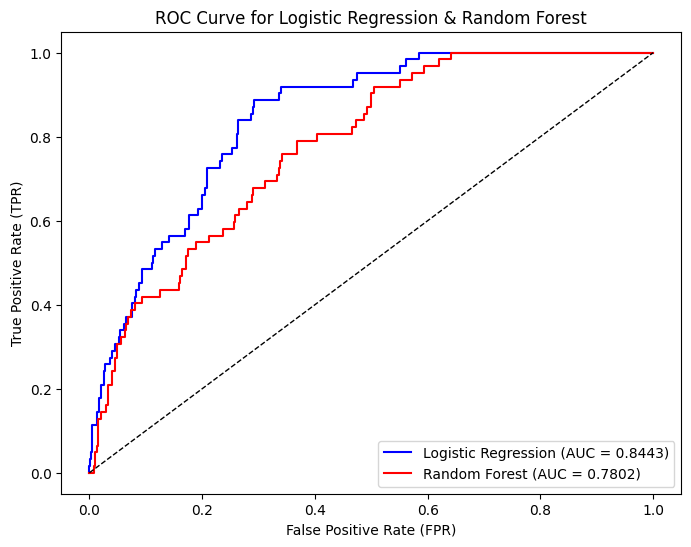

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# pred probabilites for both model
y_prob_logistic = best_model.predict_proba(X_test)[:, 1]  # Logistic Regression prob
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Random Forest prob

# ROC curve and AUC score
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logistic)
auc_log = roc_auc_score(y_test, y_prob_logistic)

# ROC curve and AUC score
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.4f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=1)

print("AUC Score for  Regression   : ",auc_log)
print("AUC Score for Classification: ",auc_rf)


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression & Random Forest")
plt.legend(loc="lower right")
plt.show()


plt.show()

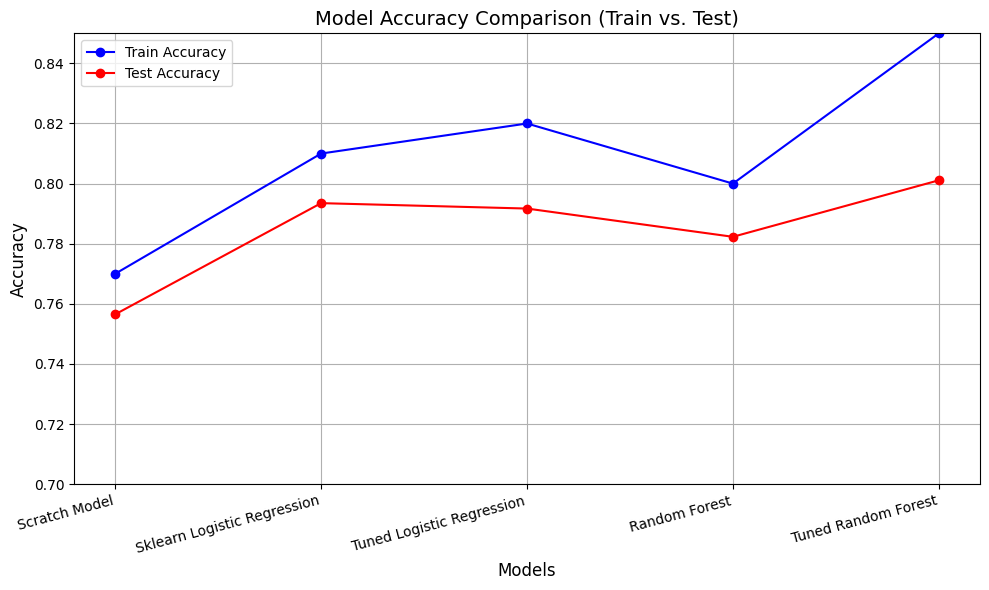

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy scores
models = ['Scratch Model', 'Sklearn Logistic Regression', 'Tuned Logistic Regression', 'Random Forest', 'Tuned Random Forest']
accuracy_scores_train = [0.77, 0.81, 0.82, 0.80, 0.85]  # Replace with your actual accuracy scores of train data
accuracy_scores_test = [0.7565, 0.7935, 0.7917, 0.7823, 0.8011]  # Replace with your actual accuracy scores of test data

# Create a line plot
plt.figure(figsize=(10, 6))

# Plotting train accuracy scores
plt.plot(models, accuracy_scores_train, marker='o', linestyle='-', color='blue', label='Train Accuracy')

# Plotting test accuracy scores
plt.plot(models, accuracy_scores_test, marker='o', linestyle='-', color='red', label='Test Accuracy')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison (Train vs. Test)', fontsize=14)
plt.ylim(0.7, 0.85)  # Set y-axis limits for better visualization

# Add grid for better readability
plt.grid(True)

# Add legend to differentiate between train and test
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

